<a href="https://colab.research.google.com/github/PandaPanna/Arcturus/blob/master/bench_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Import library

In [ ]:
!pip install pandas

from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import classification_report
from prettytable import PrettyTable
from sklearn import metrics
import numpy as np
from IPython.display import Image
!pip install -U scikit-learn
!pip show scikit-learn

from sklearn import preprocessing


Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.1)
Name: scikit-learn
Version: 0.22.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: joblib, numpy, scipy
Required-by: yellowbrick, umap-learn, textgenrnn, sklearn, sklearn-pandas, mlxtend, lucid, lightgbm, librosa, imbalanced-learn, fancyimpute


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 2.Generate the training set

In [ ]:
# Asset name should be lower case 
asset = "bench"

In [ ]:
# Generate training dataset
# Read data and combine them as training data set
df_train = pd.read_excel('/content/drive/My Drive/NCTIR/{}/Train.xlsx'.format(asset))
print(df_train.columns)
# The positive samples vs negative sample
train_pos = df_train[df_train["TARGET"]==1]
train_neg = df_train[df_train["TARGET"]==0]
print("Positive sample: ", len(train_pos), "Negative sample: ", len(train_neg))

df_train.head()

Index(['TARGET', 'ENTITY_VISIBILITY', 'HATCH_OBJECT_TYPE',
       'HATCH_PATTERN_TYPE', 'LAYER_FROZEN', 'STORE_BULGES_MODE',
       'HATCH_STYLE', 'LINETYPE_GENERATION', 'ORIGINAL_ENTITY',
       'HATCH_PATTERN_NAME', 'ORIGINAL_ENTITY_TYPE', 'LINETYPE',
       'ORIGINAL_COLOR', 'RESOLVED_LINETYPE', 'COLOR', 'Feature_Type',
       'autocad_layer_desc', 'autocad_source_filename', 'ID', '_coordcount',
       '_length', '_angularity', '_area'],
      dtype='object')
Positive sample:  60 Negative sample:  200


,TARGET,ENTITY_VISIBILITY,HATCH_OBJECT_TYPE,HATCH_PATTERN_TYPE,LAYER_FROZEN,STORE_BULGES_MODE,HATCH_STYLE,LINETYPE_GENERATION,ORIGINAL_ENTITY,HATCH_PATTERN_NAME,ORIGINAL_ENTITY_TYPE,LINETYPE,ORIGINAL_COLOR,RESOLVED_LINETYPE,COLOR,Feature_Type,autocad_layer_desc,autocad_source_filename,ID,_coordcount,_length,_angularity,_area
0,1,1,-1,-1,-1,0,-1,1,1,-1,0,-1,-2.0,1,7,L-FURN-BENCH,Dimensions,G:\GIS\Handover\Synergy DWGs\300201\x300201-LA...,660,5,5.600060,48.213683,0
1,1,1,-1,-1,-1,0,-1,1,1,-1,0,-1,-2.0,1,7,L-FURN-BENCH,Dimensions,G:\GIS\Handover\Synergy DWGs\300201\x300201-LA...,661,5,2.220800,121.574838,0
2,1,1,-1,-1,-1,0,-1,1,1,-1,0,-1,-2.0,1,7,L-FURN-BENCH,Dimensions,G:\GIS\Handover\Synergy DWGs\300201\x300201-LA...,1338,5,5.599982,48.214372,0
3,1,-1,-1,-1,-1,0,-1,1,1,-1,0,-1,-2.0,1,7,L-FURN-BENCH,Dimensions,G:\GIS\Handover\Synergy DWGs\300201\x300201-LA...,1339,5,2.220753,121.579208,0
4,1,1,-1,-1,-1,0,-1,1,1,-1,0,-1,NaN,1,7,L-FURN-BENCH,Dimensions,G:\GIS\Handover\Synergy DWGs\300104\x300104-LA...,1576,5,5.599912,48.215954,0


0    200
1     60
Name: TARGET, dtype: int64


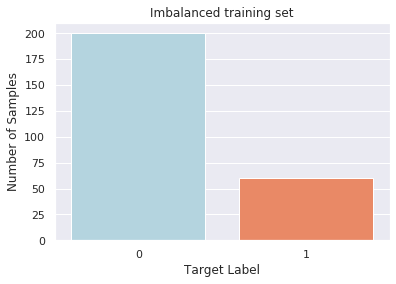

In [ ]:

# Print the positive and negative sample
color = ["lightblue", "coral"]
counts  = df_train['TARGET'].value_counts()
print(counts)
sns.barplot(counts.index, counts.values, palette=color)
plt.title('Imbalanced training set')
plt.ylabel('Number of Samples', fontsize=12)
plt.xlabel('Target Label', fontsize=12)
plt.show()
df_train = df_train.fillna(-1) 



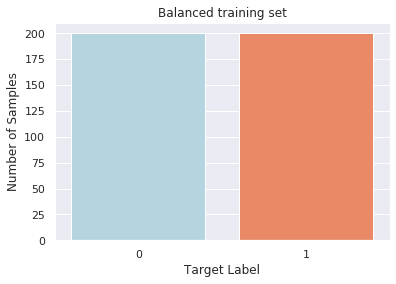

In [ ]:
# If samples are not enough, let's do resampling
train_pos = train_pos.sample(len(train_neg), replace=True)
df_train = pd.concat([train_pos, train_neg])
counts  = df_train['TARGET'].value_counts()

sns.barplot(counts.index, counts.values, palette=color)
plt.title('Balanced training set')
plt.ylabel('Number of Samples', fontsize=12)
plt.xlabel('Target Label', fontsize=12)
plt.show()

# Replace the missing data with '-1'
df_train = df_train.fillna(-1)




In [ ]:

# Choose dropped parameters
dropped_parameters = ["Feature_Type", "ID","autocad_layer_desc", "autocad_source_filename"]
train = df_train.drop(dropped_parameters, axis = 1)

# Label ecoding or hot ecoding 
train = pd.get_dummies(train, prefix_sep="_", columns=["COLOR"])
train = pd.get_dummies(train, prefix_sep="_", columns=["ORIGINAL_COLOR"])
train = pd.get_dummies(train, prefix_sep="_", columns=["ORIGINAL_ENTITY_TYPE"])
train = pd.get_dummies(train, prefix_sep="_", columns=["LINETYPE"])

train = train.fillna(-1)
X = train.iloc[:, 1:]
y = train.iloc[:,:1]


print("Target, (rows, columns)")
print("TARGET  = 1, ", train[train["TARGET"]==1].shape) 
print("TARGET  = 0, ", train[train["TARGET"]==0].shape) 


train[train['TARGET']==1].head()

# The features
print(len(X.columns), "\n",X.columns)

Target, (rows, columns)
TARGET  = 1,  (200, 41)
TARGET  = 0,  (200, 41)
40 
 Index(['ENTITY_VISIBILITY', 'HATCH_OBJECT_TYPE', 'HATCH_PATTERN_TYPE',
       'LAYER_FROZEN', 'STORE_BULGES_MODE', 'HATCH_STYLE',
       'LINETYPE_GENERATION', 'ORIGINAL_ENTITY', 'HATCH_PATTERN_NAME',
       'RESOLVED_LINETYPE', '_coordcount', '_length', '_angularity', '_area',
       'COLOR_1', 'COLOR_2', 'COLOR_3', 'COLOR_4', 'COLOR_6', 'COLOR_7',
       'COLOR_10', 'COLOR_40', 'COLOR_160', 'COLOR_170', 'COLOR_250',
       'COLOR_251', 'COLOR_252', 'COLOR_253', 'COLOR_254', 'COLOR_255',
       'ORIGINAL_COLOR_-2.0', 'ORIGINAL_COLOR_-1.0', 'ORIGINAL_ENTITY_TYPE_0',
       'ORIGINAL_ENTITY_TYPE_1', 'ORIGINAL_ENTITY_TYPE_6', 'LINETYPE_-1',
       'LINETYPE_1', 'LINETYPE_2', 'LINETYPE_5', 'LINETYPE_6'],
      dtype='object')


#3.Visualise the training data distribution

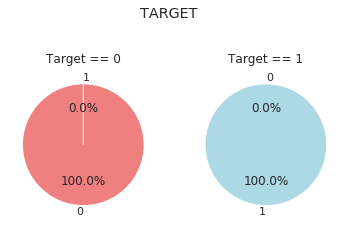

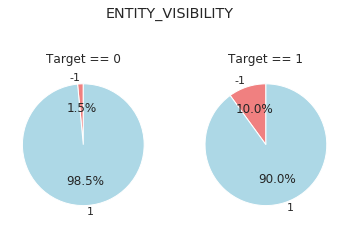

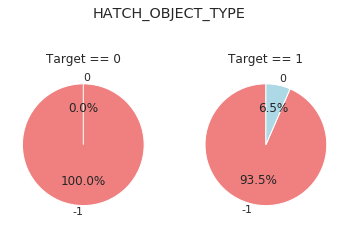

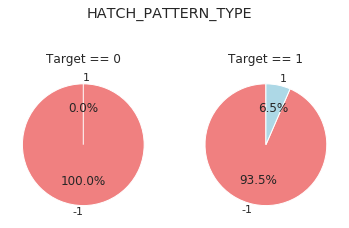

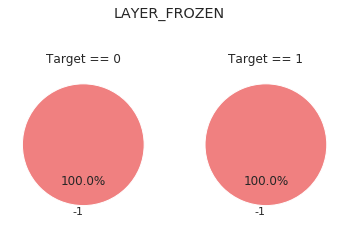

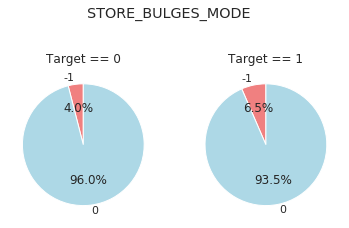

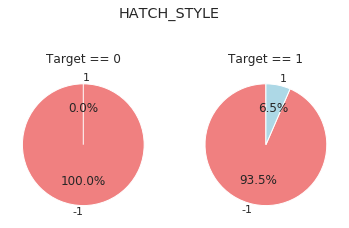

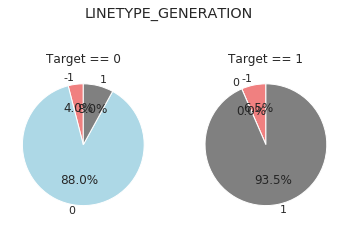

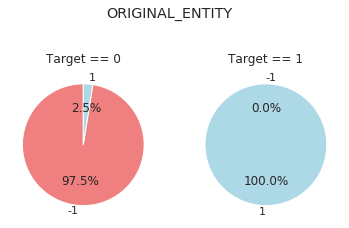

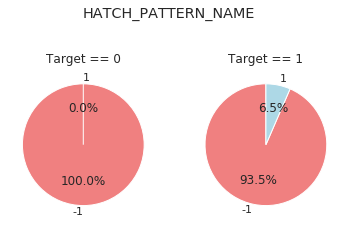

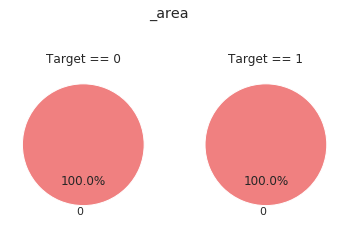

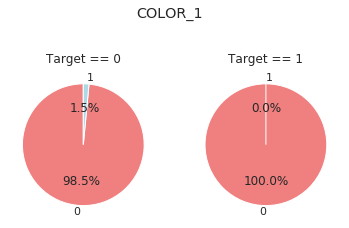

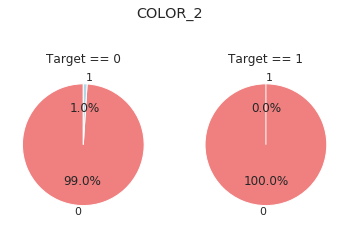

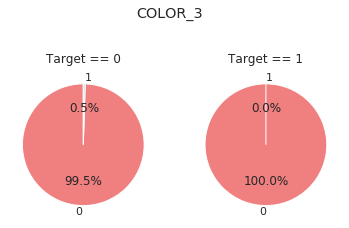

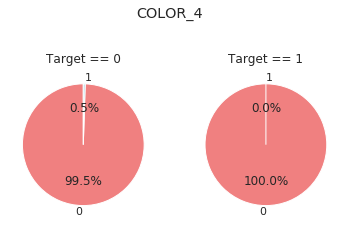

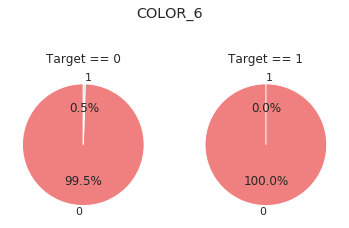

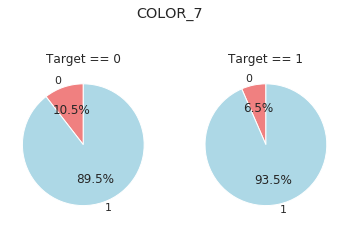

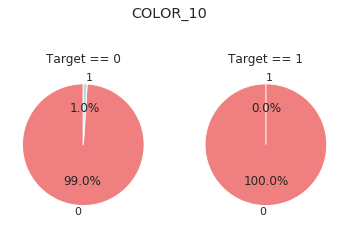

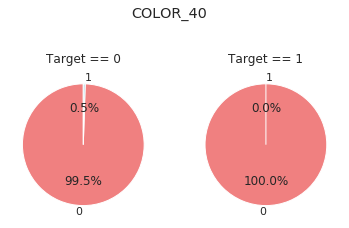

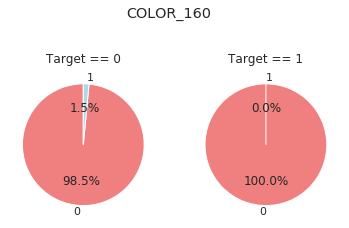

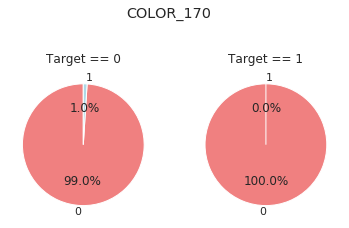

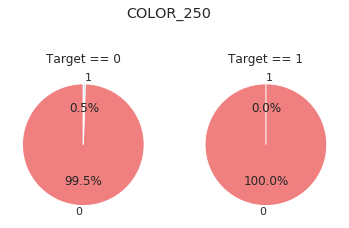

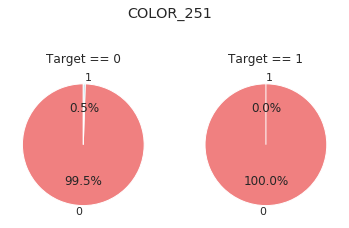

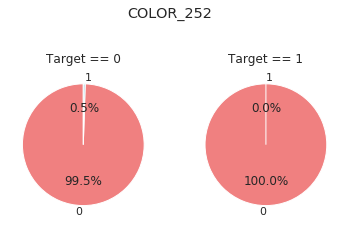

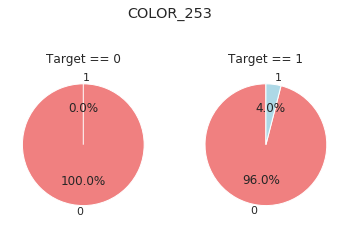

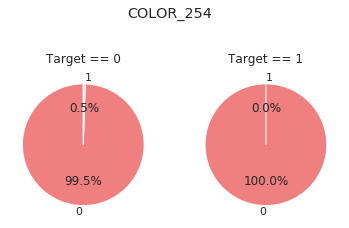

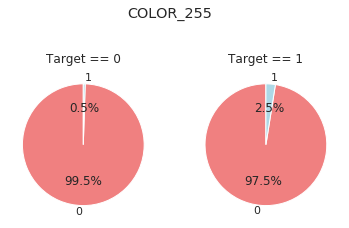

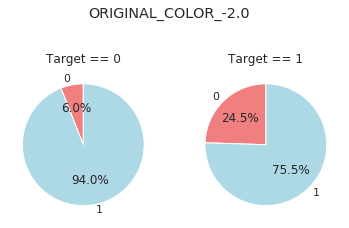

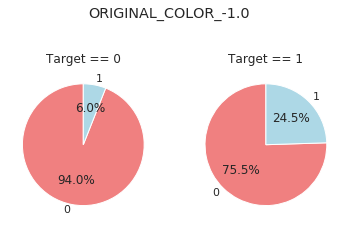

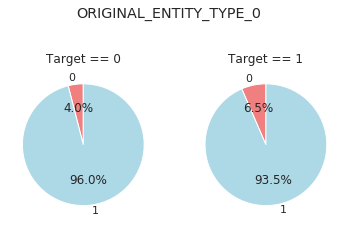

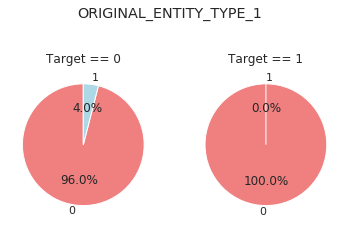

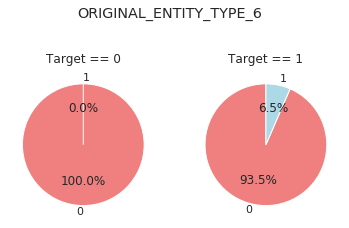

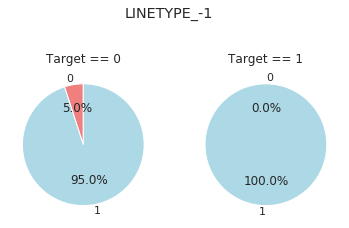

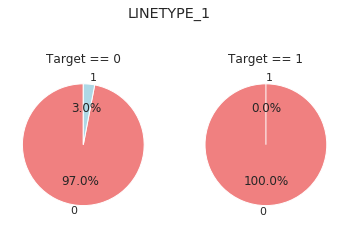

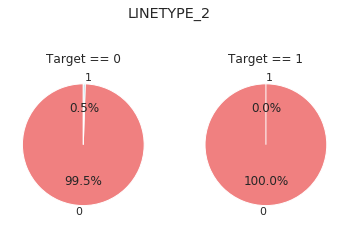

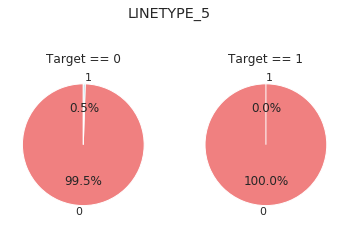

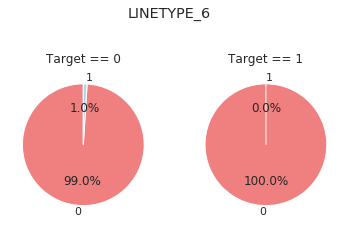

non category data are:  ['RESOLVED_LINETYPE', '_coordcount', '_length', '_angularity']


In [ ]:

# Plot categorical data distribution 
def plot_data(df):
  """plot the binary data"""
  non = []
  for variable in df.columns[0:]:
    uniques = df[variable].unique()
    uniques = sorted(list(uniques))
    variable_len = len(uniques)
    if variable_len < 4:
      fig, axs = plt.subplots(1, 2)
      fig.suptitle(variable)
      for target in range(2):
        counts = []
        for unique in uniques:
          number = df[(df[variable]==unique) & (df["TARGET"]==target)].count()["TARGET"]
          counts.append(number)
        colors = ["lightcoral", "lightblue", "grey", "gold"]
        axs[target].pie(counts, labels=uniques, colors=colors, startangle=90, autopct='%.1f%%')
        axs[target].set_title("Target == {}".format(target))
      plt.show()
    else:
      non.append(variable)
  print("non category data are: ", non)
        

plot_data(train)

# 4.Generate the test set

In [ ]:
# Generate test data
df_test = pd.read_excel('/content/drive/My Drive/NCTIR/{}/Test.xlsx'.format(asset))
print(df_test.TARGET.value_counts())
df_test = df_test.fillna(-1)



# Drop parameters
test = df_test.drop(dropped_parameters, axis = 1)
# Label ecoding or hot ecoding 
test = pd.get_dummies(test, prefix_sep="_", columns=["COLOR"])
test = pd.get_dummies(test, prefix_sep="_", columns=["ORIGINAL_COLOR"])
test = pd.get_dummies(test, prefix_sep="_", columns=["ORIGINAL_ENTITY_TYPE"])
test= pd.get_dummies(test, prefix_sep="_", columns=["LINETYPE"])

# For test data, the more features are created during the hot ecoding
test = test.loc[:,train.columns]
test = test.fillna(-1)
print("Target, (rows, columns)")
print("TARGET  = 1, ", test[test["TARGET"]==1].shape) 
print("TARGET  = 0, ", test[test["TARGET"]==0].shape) 

X_test = test.iloc[:, 1:]
y_test = test.iloc[:,:1]

 
X_test.columns

0    11854
1       22
Name: TARGET, dtype: int64
Target, (rows, columns)
TARGET  = 1,  (22, 41)
TARGET  = 0,  (11854, 41)


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Index(['ENTITY_VISIBILITY', 'HATCH_OBJECT_TYPE', 'HATCH_PATTERN_TYPE',
       'LAYER_FROZEN', 'STORE_BULGES_MODE', 'HATCH_STYLE',
       'LINETYPE_GENERATION', 'ORIGINAL_ENTITY', 'HATCH_PATTERN_NAME',
       'RESOLVED_LINETYPE', '_coordcount', '_length', '_angularity', '_area',
       'COLOR_1', 'COLOR_2', 'COLOR_3', 'COLOR_4', 'COLOR_6', 'COLOR_7',
       'COLOR_10', 'COLOR_40', 'COLOR_160', 'COLOR_170', 'COLOR_250',
       'COLOR_251', 'COLOR_252', 'COLOR_253', 'COLOR_254', 'COLOR_255',
       'ORIGINAL_COLOR_-2.0', 'ORIGINAL_COLOR_-1.0', 'ORIGINAL_ENTITY_TYPE_0',
       'ORIGINAL_ENTITY_TYPE_1', 'ORIGINAL_ENTITY_TYPE_6', 'LINETYPE_-1',
       'LINETYPE_1', 'LINETYPE_2', 'LINETYPE_5', 'LINETYPE_6'],
      dtype='object')

In [ ]:
df_test.head()

,TARGET,ENTITY_VISIBILITY,HATCH_OBJECT_TYPE,HATCH_PATTERN_TYPE,LAYER_FROZEN,STORE_BULGES_MODE,HATCH_STYLE,LINETYPE_GENERATION,ORIGINAL_ENTITY,HATCH_PATTERN_NAME,ORIGINAL_ENTITY_TYPE,LINETYPE,ORIGINAL_COLOR,RESOLVED_LINETYPE,COLOR,Feature_Type,autocad_layer_desc,autocad_source_filename,ID,_coordcount,_length,_angularity,_area
0,0,1,-1,-1,-1,0,-1,0,-1,-1,0,-1,-2.0,1,7,L-DETL-W025-OTLN,0.25 Outline,G:\GIS\Handover\Synergy DWGs\300302\300302-DD-...,0,2,0.000100,0.000000,0
1,0,1,-1,-1,-1,0,-1,1,-1,-1,0,-1,-2.0,1,7,L-DETL-W025-OTLN,0.25 Outline,G:\GIS\Handover\Synergy DWGs\300302\300302-DD-...,1,2,3.002347,0.000000,0
2,0,1,-1,-1,-1,0,-1,1,-1,-1,0,-1,-2.0,1,7,L-DETL-W025-OTLN,0.25 Outline,G:\GIS\Handover\Synergy DWGs\300302\300302-DD-...,2,3,5.652274,15.423985,0
3,0,1,-1,-1,-1,0,-1,1,-1,-1,0,-1,-2.0,1,7,L-DETL-W025-OTLN,0.25 Outline,G:\GIS\Handover\Synergy DWGs\300302\300302-DD-...,3,40,102.870126,3.260402,0
4,0,1,-1,-1,-1,0,-1,1,-1,-1,0,-1,-2.0,1,7,L-DETL-W025-OTLN,0.25 Outline,G:\GIS\Handover\Synergy DWGs\300302\300302-DD-...,4,2,1.037487,0.000000,0


0    11854
1       22
Name: TARGET, dtype: int64


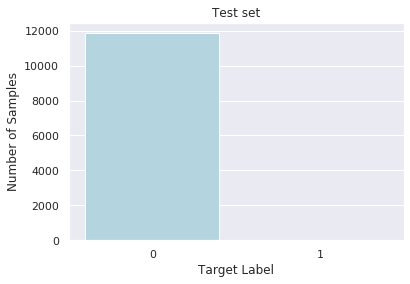

In [ ]:
counts  = df_test['TARGET'].value_counts()
print(counts)
sns.barplot(counts.index, counts.values, palette=color)
plt.title('Test set')
plt.ylabel('Number of Samples', fontsize=12)
plt.xlabel('Target Label', fontsize=12)
plt.show()

# 5.Evaluation functions


##5.1Single algorithm evaluation

In [ ]:
# Evaluate model

def test_model(model, X, y, test_X, test_y):
  """Input model name, show the ROC curve and metrix"""
  model.fit(X, y)
  y_predict = model.predict(test_X)
  print("%s: %f" % (str(model), metrics.accuracy_score(y_test, y_predict)))
  print(metrics.classification_report(y_test, y_predict))
  y_predict_proba = model.predict_proba(test_X)
  fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_proba[:,1])
  roc_auc = metrics.auc(fpr, tpr)
  
  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',
           lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic curve')
  plt.legend(loc="lower right")
  plt.show()
  # Print contigency matrix
  print("Contigency matrix")

  metrix = metrics.confusion_matrix(y_test, y_predict)
  
  table = PrettyTable()
  table.title = 'Results for prediction'
  table.field_names = [" ", 'Predicted 0 ', 'Predicted 1', "Total"]
  table.add_row(["Real 0", metrix[0][0], metrix[0][1], sum(metrix[0])])
  table.add_row(["Real 1", metrix[1][0],metrix[1][1], sum(metrix[1])])
  table.add_row(["-------------", "-------------", "-------------", "-------------"])
  table.add_row(["Total: ", metrix[0][0]+ metrix[1][0], metrix[0][1]+metrix[1][1],sum(metrix[0])+sum(metrix[1])])
  print(table)
  tn, fp, fn, tp = metrix.ravel()
  FP =   fp/(fp+tn)
  FN =   fn/(tp+fn)
  TP =   tp/(fn+tp)
  TN =   tn/(tn+fp)
  precision = tp/(tp+fp)
  accuracy = metrics.accuracy_score(y_test, y_predict)
  print("False Positive Rate: ", "%.3f" % FP)
  print("False Negative Rate: ", "%.3f" % FN)
  print("True Negative Rate (Specificity): ", "%.3f" % TN)
  print("True Positive Rate (Recall): ", "%.3f" % TP)
  print("Precision: ", "%.3f" % precision)
  print("Accuracy:", "%.3f" % accuracy)
  print("Cross validation accuracy score: " + "{:.3f}".format(get_cv_acc(model, X, y, X_test, y_test)))
  class_names=[0,1] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # create heatmap
  sns.heatmap(pd.DataFrame(metrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')


##5.2Cross validation

In [ ]:
# Build the k-fold cross-validator
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
def get_cv_acc(model, X, y, X_test, y_test, k=3):
  """Print cross validation accuracy score"""
  kfold = KFold(n_splits=k, random_state=7)
  X_total = pd.concat([X, X_test])
  y_total = pd.concat([y, y_test])
  result = cross_val_score(model, X_total, y_total, cv=kfold, scoring='accuracy')
  return result.mean()

##5.3Multiple model evaluation function

In [ ]:
# Define a function to compare multiple models
import os.path



def test_multi_model(asset, models, X, y, test_X, test_y):
  """Input model name, show the ROC curve and metrix"""
  table = PrettyTable()
  table.reversesort = True
  table.title = 'Results are: ' 
  heads = ["Algorithm","False positive Rate", "False negative rate","True positive rate","True negative rate","Accuracy", "CV_Accuracy","Precision", "F1 score"]
  table.field_names = heads
  for model_name in models.keys():
    print(model_name)
    heads.append(model_name)
    model = models[model_name]
    model.fit(X, y)
    y_predict = model.predict(test_X)
    metrix = metrics.confusion_matrix(y_test, y_predict)
    tn, fp, fn, tp = metrix.ravel()
    FP =   fp/(fp+tn)
    FN =   fn/(tp+fn)
    TP =   tp/(fn+tp)
    TN =   tn/(tn+fp)
    precision = tp/(tp+fp)
    accuracy = metrics.accuracy_score(y_test, y_predict)
    cv_acc = get_cv_acc(model, X, y, X_test, y_test)
    row = [model_name]
    row.append("{:.3f}".format(FP))
    row.append("{:.3f}".format(FN))
    row.append("{:.3f}".format(TP))
    row.append("{:.3f}".format(TN))
    row.append("{:.3f}".format(accuracy))
    row.append("{:.3f}".format(cv_acc))
    row.append("{:.3f}".format(precision))
    f1_score = 2*((precision*TP)/(precision+TP))
    row.append("{:.3f}".format(f1_score))
    table.add_row(row)
  data = table.get_string(sortby="F1 score")
  print(data)
  # Write into txt file
  save_path = "/content/drive/My Drive/NCTIR/{}".format(asset)
  with open(os.path.join(save_path, 'accuracy.txt'), "w") as f:
    f.write(data)

#6.Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier

# Add model into the dictionary to compare the result

models = {"LogistcRegression": LogisticRegression(), 
          "KNN n=3": neighbors.KNeighborsClassifier(n_neighbors=3), 
          "KNN n=5": neighbors.KNeighborsClassifier(n_neighbors=5), 
          "KNN n=10": neighbors.KNeighborsClassifier(n_neighbors=10), 
          "DecisionTree":DecisionTreeClassifier(),
          "RandomForest n=5": RandomForestClassifier(n_estimators=5,  random_state= 0),
          "RandomForest n=10": RandomForestClassifier(n_estimators=10,  random_state= 0),
          "NaiveBayes":GaussianNB(),
          "SVM (kernel='linear')": SVC(kernel='linear'),
          "SVM (kernel='sigmoid')": SVC(kernel='sigmoid')}

"""
          "StochasticGradientDescent": linear_model.SGDClassifier(),
          "Ridge":linear_model.RidgeClassifier(),
          "Perceptron":linear_model.Perceptron(random_state=0),
          "PassiveAggressive":linear_model.PassiveAggressiveClassifier(random_state=0),
"""

test_multi_model(asset, models, X, y, X_test, y_test)

LogistcRegression


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_

KNN n=3


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d arr

KNN n=5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

KNN n=10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

DecisionTree
RandomForest n=5
RandomForest n=10


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

NaiveBayes
SVM (kernel='linear')


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

SVM (kernel='sigmoid')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

+------------------------+---------------------+---------------------+--------------------+--------------------+----------+-------------+-----------+----------+
|       Algorithm        | False positive Rate | False negative rate | True positive rate | True negative rate | Accuracy | CV_Accuracy | Precision | F1 score |
+------------------------+---------------------+---------------------+--------------------+--------------------+----------+-------------+-----------+----------+
|       NaiveBayes       |        0.016        |        1.000        |       0.000        |       0.984        |  0.982   |    0.503    |   0.000   |   nan    |
|    RandomForest n=5    |        0.005        |        0.000        |       1.000        |       0.995        |  0.995   |    0.986    |   0.256   |  0.407   |
|   RandomForest n=10    |        0.007        |        0.000        |       1.000        |       0.993        |  0.993   |    0.987    |   0.212   |  0.349   |
|      DecisionTree      |        

#7.Get accuracy table with CSV format

In [ ]:
# Get the accuracy table with CSV
data = [["Algorithm","False positive Rate", "False negative rate","True positive rate","True negative rate","Accuracy", "CV_Accuracy","Precision", "F1 score"]]

f = open("/content/drive/My Drive/NCTIR/{}/accuracy.txt".format(asset), "r")
lines = f.readlines()
for line in lines[3:-1]:
  line = line.strip()
  linedata = line[2:-2].split(" | ")
  data.append(linedata)
data = np.array(data)
r = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])

r.to_csv("/content/drive/My Drive/NCTIR/{}/accuracy.csv".format(asset))
r.head(10)

,False positive Rate,False negative rate,True positive rate,True negative rate,Accuracy,CV_Accuracy,Precision,F1 score
NaiveBayes,0.016,1.000,0.000,0.984,0.982,0.503,0.000,nan
RandomForest n=5,0.005,0.000,1.000,0.995,0.995,0.986,0.256,0.407
RandomForest n=10,0.007,0.000,1.000,0.993,0.993,0.987,0.212,0.349
DecisionTree,0.012,0.000,1.000,0.988,0.988,0.982,0.133,0.235
SVM (kernel='linear'),0.103,0.000,1.000,0.897,0.897,0.981,0.018,0.035
LogistcRegression,0.113,0.000,1.000,0.887,0.887,0.989,0.016,0.032
KNN n=5,0.192,0.000,1.000,0.808,0.809,0.988,0.010,0.019
KNN n=3,0.187,0.000,1.000,0.813,0.813,0.990,0.010,0.019
SVM (kernel='sigmoid'),0.204,0.000,1.000,0.796,0.796,0.976,0.009,0.018
KNN n=10,0.198,0.000,1.000,0.802,0.802,0.983,0.009,0.018


#8.Test one single model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False): 0.993095
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     11854
           1       0.21      1.00      0.35        22

    accuracy                           0.99     11876
   macro avg       0.61      1.00      0.67     11876
weighted avg       1.00      0.99      1.00     11876



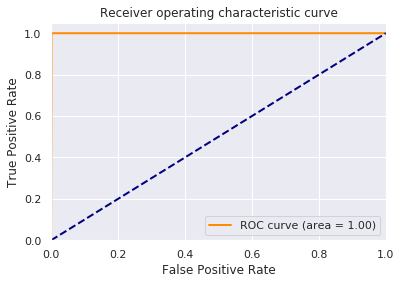

Contigency matrix
+---------------+---------------+---------------+---------------+
|               |  Predicted 0  |  Predicted 1  |     Total     |
+---------------+---------------+---------------+---------------+
|     Real 0    |     11772     |       82      |     11854     |
|     Real 1    |       0       |       22      |       22      |
| ------------- | ------------- | ------------- | ------------- |
|    Total:     |     11772     |      104      |     11876     |
+---------------+---------------+---------------+---------------+
False Positive Rate:  0.007
False Negative Rate:  0.000
True Negative Rate (Specificity):  0.993
True Positive Rate (Recall):  1.000
Precision:  0.212
Accuracy: 0.993
Cross validation accuracy score: 0.987


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array

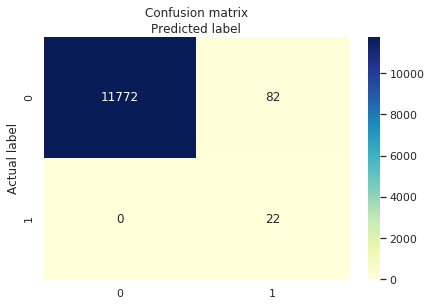

In [ ]:
model =  RandomForestClassifier(n_estimators=10,  random_state=0)
test_model(model, X, y, X_test, y_test)

#9.Get output function

In [ ]:
def get_output(model, X, y, X_test, df):
  """Get the output only without test y"""
  model.fit(X, y)
  result = df.loc[:,["ID","TARGET"]]
  result["result"] = model.predict(X_test)
  result.to_excel("/content/drive/My Drive/NCTIR/{}/Result.xlsx".format(asset))


#10.Check the false positive/negative function

In [ ]:
# Inspect false positive result
def get_fp(model, X, y, X_test, df):
  """Return false positive result as df"""
  model.fit(X, y)
  result = df.loc[:,["TARGET", "Feature_Type"]]
  result["result"] = model.predict(X_test)
  print("*"*50, "False Positive", "*"*50)
  fp = result.loc[(result['result'] ==1) & (result["TARGET"]==0)]
  if fp.empty:
    print("There is no false positive result!")
  else:  
    print("False positive results are: ")
    print(fp.to_string(), "\n")
  print("*"*50, "False Negative", "*"*50)
  fn = result.loc[(result['result'] ==0) & (result["TARGET"]==1)]
  if fn.empty:
    print("There is no false negative result!")
  else: 
    print("False negative results are: ")
    print(fn.to_string(), "\n")
  print("*"*50, "True Positive", "*"*50)
  tp = result.loc[(result['result'] ==1) & (result["TARGET"]==1)]
  print(tp.to_string())


get_fp(model, X, y, X_test, df_test)


************************************************** False Positive **************************************************
False positive results are: 
      TARGET            Feature_Type  result
3188       0     C-ROAD-BERM-HATCH-N       1
3467       0  C-ROAD-MARK-PARK-LINES       1
3468       0  C-ROAD-MARK-PARK-LINES       1
6391       0               Defpoints       1
6454       0               Defpoints       1
6464       0               Defpoints       1
6492       0               Defpoints       1
6494       0               Defpoints       1
6607       0               Defpoints       1
6659       0               Defpoints       1
6677       0               Defpoints       1
6683       0               Defpoints       1
6695       0               Defpoints       1
6707       0               Defpoints       1
6710       0               Defpoints       1
6711       0               Defpoints       1
6713       0               Defpoints       1
6809       0               Defpoints       1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


To extract shelter among all the lines is difficult, highest accuracy only .69.
But when giving retaining wall/rockfall mitigation maybe shelter, the task is much easier. 
https://colab.research.google.com/drive/1zbWCDvYShcey9lSgoGlfJs7uCWuuqyqe


#10. Feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import collections

def select_features(model, X, y, n=10):
  """Input the number of features you want to have"""
  candidate = []
  # Build step forward feature selection
  sfs1 = sfs(model,
            k_features=n,
            forward=True,
            floating=False,
            verbose=2,
            scoring='accuracy',
            cv=5)
  # Perform SFFS
  sfs1 = sfs1.fit(X, y)
  # The index list of the important features
  feat_cols = list(sfs1.k_feature_idx_)
  for idx in feat_cols:
    candidate.append(X.columns[idx])
  return candidate


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
model = RandomForestClassifier(n_estimators=5, random_state=0, max_depth=4)
selected_feats = select_features(model, X, y, n=10)
print(selected_feats)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selectio

['ENTITY_VISIBILITY', 'HATCH_OBJECT_TYPE', 'HATCH_PATTERN_TYPE', 'LAYER_FROZEN', 'ORIGINAL_ENTITY', '_coordcount', '_length', 'COLOR_3', 'COLOR_7', 'COLOR_10']


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
# Show the selected top 10 features
selected_feats

['ENTITY_VISIBILITY',
 'HATCH_OBJECT_TYPE',
 'HATCH_PATTERN_TYPE',
 'LAYER_FROZEN',
 'ORIGINAL_ENTITY',
 '_coordcount',
 '_length',
 'COLOR_3',
 'COLOR_7',
 'COLOR_10']

In [ ]:

# Build full model with selected features
clf = RandomForestClassifier(n_estimators=5, random_state=0, max_depth=4)
clf.fit(X.loc[:, selected_feats], y)

y_train_pred = clf.predict(X.loc[:, selected_feats])
print('Training accuracy on selected features: %.3f' % acc(y, y_train_pred))

y_test_pred = clf.predict(X_test.loc[:, selected_feats])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on selected features: 1.000
Testing accuracy on selected features: 0.994


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
# Build full model on ALL features, for comparison
clf = RandomForestClassifier(n_estimators=5, random_state=0, max_depth=4)
clf.fit(X, y)

y_train_pred = clf.predict(X)
print('Training accuracy on all features: %.3f' % acc(y, y_train_pred))

y_test_pred = clf.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on all features: 1.000
Testing accuracy on all features: 0.988


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False): 0.993095
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     11854
           1       0.21      1.00      0.35        22

    accuracy                           0.99     11876
   macro avg       0.61      1.00      0.67     11876
weighted avg       1.00      0.99      1.00     11876



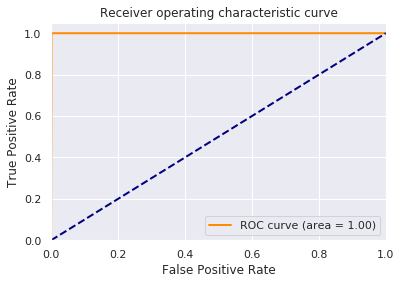

Contigency matrix
+---------------+---------------+---------------+---------------+
|               |  Predicted 0  |  Predicted 1  |     Total     |
+---------------+---------------+---------------+---------------+
|     Real 0    |     11772     |       82      |     11854     |
|     Real 1    |       0       |       22      |       22      |
| ------------- | ------------- | ------------- | ------------- |
|    Total:     |     11772     |      104      |     11876     |
+---------------+---------------+---------------+---------------+
False Positive Rate:  0.007
False Negative Rate:  0.000
True Negative Rate (Specificity):  0.993
True Positive Rate (Recall):  1.000
Precision:  0.212
Accuracy: 0.993
Cross validation accuracy score: 0.987


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array

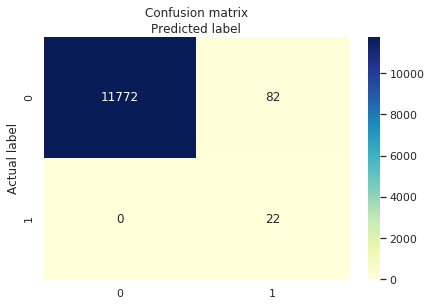

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model =  RandomForestClassifier(n_estimators=10,  random_state=0)
test_model(model, X, y, X_test, y_test)

In [ ]:
model =  RandomForestClassifier(n_estimators=10,  random_state=0)
test_model(model, X.loc[:, selected_feats], y, X_test.loc[:, selected_feats], y_test)

NameError: ignored

In [ ]:
get_fp(model, X.loc[:, selected_feats ], y, X_test.loc[:, selected_feats ], df_test)

************************************************** False Positive **************************************************
False positive results are: 
      TARGET         Feature_Type  result
3188       0  C-ROAD-BERM-HATCH-N       1
9186       0         G-ANNO-HATCH       1
9223       0         G-ANNO-HATCH       1
9655       0           L-PLNT-BDY       1 

************************************************** False Negative **************************************************
There is no false negative result!
************************************************** True Positive **************************************************
      TARGET            Feature_Type  result
2366       1  AUDIT_D_181031114444-4       1
2367       1  AUDIT_D_181031114444-4       1
2368       1  AUDIT_D_181031114444-4       1
2369       1  AUDIT_D_181031114444-4       1
2370       1  AUDIT_D_181031114444-4       1
2371       1  AUDIT_D_181031114444-4       1
2372       1  AUDIT_D_181031114444-4       1
2373       1  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
get_output(model, X.loc[:, selected_feats ], y, X_test.loc[:, selected_feats ], df_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
